<a href="https://colab.research.google.com/github/Alanthomas-2209/DATA-SCIENCE-LAB/blob/main/CO3%20/Support%20vector%20machines%20(SVMs)/SVM(IRIS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier with a radial basis function (RBF) kernel
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
# svm_classifier = SVC(kernel='poly', C=1.0, gamma='scale', random_state=42)
# svm_classifier_linear = SVC(kernel='linear', C=1.0, random_state=42)
# svm_classifier_poly = SVC(kernel='poly', degree=3, C=1.0, random_state=42)



# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

#predict
svm_classifier.predict([ [4.6, 3.1, 1.5, 0.2]])


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



array([2])

 The following code is not needed for study purposes and can be omitted.

 **It is provided for additional context or advanced use cases.**

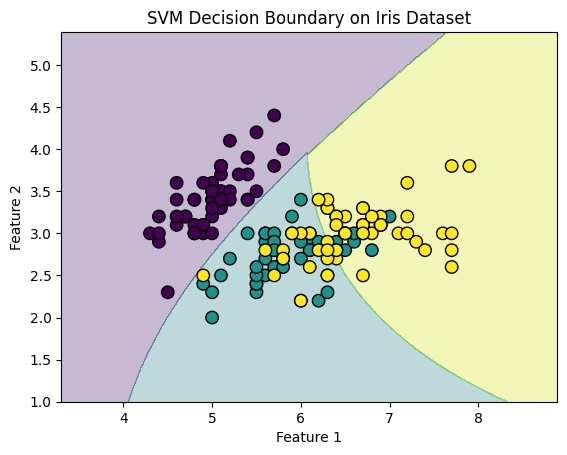

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the first two features for visualization
X_vis = X[:, :2]

# Fit the SVM classifier on the first two features
svm_classifier.fit(X_vis, y)

# Create a meshgrid to plot the decision boundary
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Make predictions on the meshgrid points
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=80)
plt.title('SVM Decision Boundary on Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot
plt.show()


Using a **pipeline in scikit-learn** is a convenient way to streamline a lot of the routine processes, especially when you're dealing with preprocessing steps and a machine learning model. Here's an example of how to use a pipeline with an SVM classifier:

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing (standardization) and an SVM classifier
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the features
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))  # Step 2: SVM classifier
])

# Fit the pipeline on the training data
svm_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_pipeline.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

